<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/Two_Level_Factorial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Python notebook demonstrates the computation of Two-Level factorial experimental analysis. The example is from Montgomery Intro to SQC (7th ed chap 13 Ex 13.6 Router Experiment).  Ref.
https://www.statsmodels.org/stable/regression.html#examples
 

In [4]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc


In [5]:
# factor A is bit size and factor B is speed and the response is vibration
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/KState_IMSE541/main/Ex13-6%20Router%20Experiment%202k%20k%3D2.csv', sep=',', na_values=".")

data  

,A,B,Vibration
0,-1,-1,18.2
1,1,-1,27.2
2,-1,1,15.9
3,1,1,41.0
4,-1,-1,18.9
5,1,-1,24.0
6,-1,1,14.5
7,1,1,43.9
8,-1,-1,12.9
9,1,-1,22.4


The F test from one-way ANOVA is used to test
**H0: betaA=0 **vs
H1: betaA <>0
Since the pvalue is very small, we would reject H0 and conclude that 
there is a difference in paper strenght influenced by hardwood concentration use the same method for factor B and interaction AB

In [6]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          16 non-null     int64  
 1   B          16 non-null     int64  
 2   Vibration  16 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 512.0 bytes


In [7]:
# To generate anova table using the ols model from statsmodel
# generate ANOVA table
# we use ordinary least square method for full factorial

model = ols('Vibration ~ C(A) + C(B) + C(A):C(B)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(A),1107.225625,1.0,185.251595,1.174669e-08
C(B),227.255625,1.0,38.022482,4.826292e-05
C(A):C(B),303.630625,1.0,50.800899,1.201078e-05
Residual,71.722500,12.0,NaN,NaN


In [8]:
#create the interaction column
#convert the dataframe column into numpy for computation
aa=df[['A']].to_numpy()
bb=df[['B']].to_numpy()
AB=aa*bb
AB

array([[ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1]])

In [9]:
# attached the AB column into the dataframe df
# add a column of 1s into the X matrix
# X is the design matrix
df['AB']=AB
X=df[['A', 'B', 'AB']]
X = sm.add_constant(X) # adding a constant
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,A,B,AB
0,1.0,-1,-1,1
1,1.0,1,-1,-1
2,1.0,-1,1,-1
3,1.0,1,1,1
4,1.0,-1,-1,1
5,1.0,1,-1,-1
6,1.0,-1,1,-1
7,1.0,1,1,1
8,1.0,-1,-1,1
9,1.0,1,-1,-1


In [10]:
# Y is the response
Y=df[['Vibration']]
Y

,Vibration
0,18.2
1,27.2
2,15.9
3,41.0
4,18.9
5,24.0
6,14.5
7,43.9
8,12.9
9,22.4


In [11]:
# with statsmodels and design matrix X

model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:              Vibration   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     91.36
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           1.57e-08
Time:                        20:57:37   Log-Likelihood:                -34.705
No. Observations:                  16   AIC:                             77.41
Df Residuals:                      12   BIC:                             80.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8313      0.611     38.991      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [12]:
# res is the fitted model
res.resid

0     2.100
1     3.175
2     0.975
3     0.725
4     2.800
5    -0.025
6    -0.425
7     3.625
8    -3.200
9    -1.625
10    0.175
11   -3.975
12   -1.700
13   -1.525
14   -0.725
15   -0.375
dtype: float64

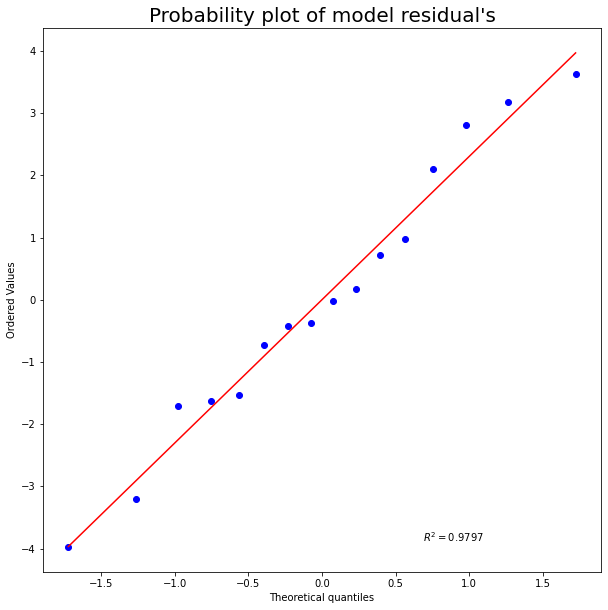

In [13]:
# Residual Analysis
# normal check
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [14]:
# Homogeneity of Variance check
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(df['Vibration'][df['A'] == -1],
             df['Vibration'][df['A'] == 1])
            

LeveneResult(statistic=39.79940673317216, pvalue=1.9270976654018198e-05)

Since p value is very small, we reject that factor A has equal variance

In [15]:
# Homogeneity of Variance check
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(df['Vibration'][df['B'] == -1],
             df['Vibration'][df['B'] == 1])

LeveneResult(statistic=45.962979982969955, pvalue=8.884422085982283e-06)

The p value of the Levene is very small. We reject the hypothesis that the variances from different primer type are different

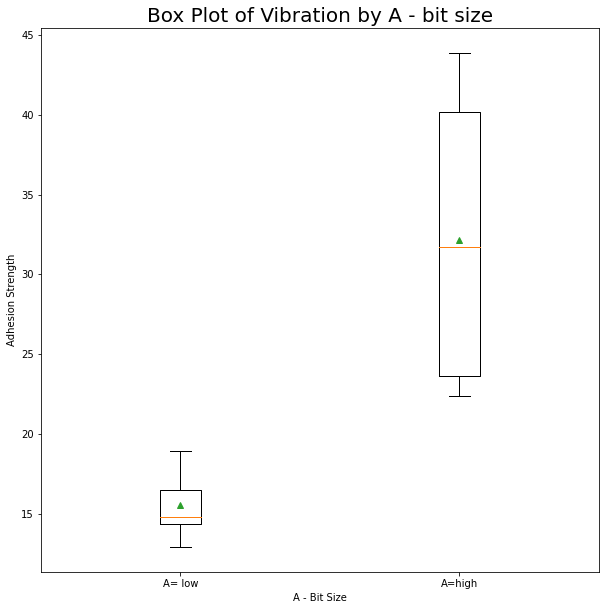

In [16]:
# Box plots by factor Primer_type'
# If the IRQ=75% quartitle - 25% quartile are very different, then question the constant variance assumption
# If the F test p value is very small, we reject H0 and can use this box plot to identify the best factor level

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by A - bit size", fontsize= 20)
ax.set

data2 = [df['Vibration'][df['A'] == -1],
             df['Vibration'][df['A'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("A - Bit Size")
plt.ylabel("Adhesion Strength")

plt.show()

There is not much difference in variation. The largest adhesion strength is due to type 2 primer type.

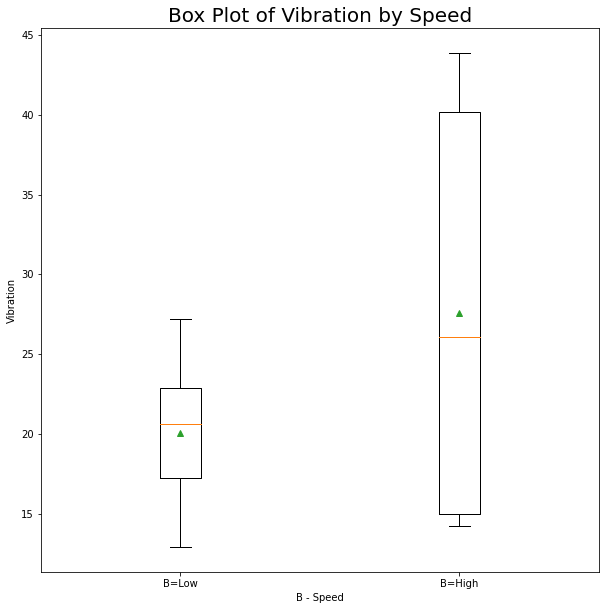

In [17]:
# Box plots by factor Application Methods
# same instruction as the previous factor Primer types

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by Speed", fontsize= 20)
ax.set

data2 = [df['Vibration'][df['B'] == -1],
         df['Vibration'][df['B'] == +1]]


ax.boxplot(data2,
           labels= ['B=Low', 'B=High'],
           showmeans= True)

plt.xlabel("B - Speed")
plt.ylabel("Vibration")

plt.show()

There is not much difference in variation by application method. The largest adhesion strength is due to spraying method.

In [20]:
eij=res.resid
eij

0     2.100
1     3.175
2     0.975
3     0.725
4     2.800
5    -0.025
6    -0.425
7     3.625
8    -3.200
9    -1.625
10    0.175
11   -3.975
12   -1.700
13   -1.525
14   -0.725
15   -0.375
dtype: float64

In [21]:
# testing the random order for collecting observations 
# Minitab calls the order variable, run order
# the following code generate a random order
# you should conduct your experiments using the random order generated
# for example, the first number is 5, it means that you will run the setting 5 in the experimentation table
# observation label 5 is primier type 3 and application method 2 (spraying)
# the run observation 11 and so on until all observations are collected
# import random (see the first cell)
N = len(eij)
c = list(range(0, N))
order = random.sample(c, N) # this should be replaced by the exact run order if the random order is not used
print('order of observations/residuals is')
print(order)

order of observations/residuals is
[3, 8, 14, 13, 6, 7, 10, 12, 11, 15, 1, 2, 4, 0, 5, 9]


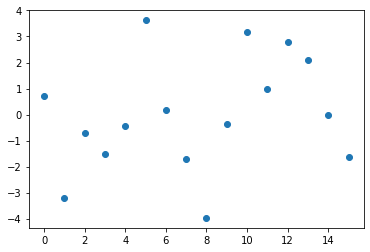

In [22]:
# assume that this random order is how we collected the data in time sequence
# if there is no pattern in the scatter plot, then don't reject independence assumption

eij=res.resid

x = range(0,N) # from the first collected obs to the last in order
y = eij[order] # assign run order (see the previous code box)

plt.scatter(x, y)

The random order from the scatter plot above shows no pattern. If the data in the first half of the experiments are lower than 0 while those of the second half are above 0. Then there is a bias in data collection. If the residuals are small in the beginning but graduately increase. Or vice versa. It is a concern as well. In these cases, independence assumption is violated.